In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")


In [2]:
data = pd.read_csv(r"D:\PFP\Projects\MS Stock Price\MSFT.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,214.479996,215.800003,206.500000,207.070007,205.084259,38135600
1,2020-07-14,206.130005,208.850006,202.029999,208.350006,206.351974,37591800
2,2020-07-15,209.559998,211.330002,205.029999,208.039993,206.044937,32179400
3,2020-07-16,205.399994,205.699997,202.309998,203.919998,201.964462,29940700
4,2020-07-17,204.470001,205.039993,201.389999,202.880005,200.934448,31635300


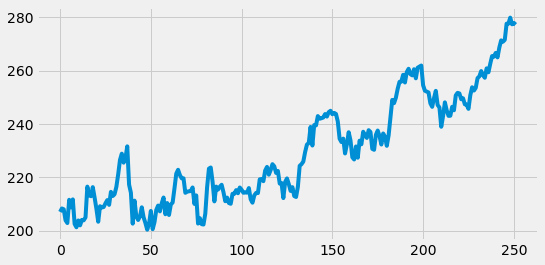

In [3]:
plt.figure(figsize=(8,4))
plt.plot(data["Close"])
plt.show()

In [4]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996066,0.995243,0.990152,0.990245,-0.301632
High,0.996066,1.000000,0.995413,0.995409,0.995380,-0.277578
Low,0.995243,0.995413,1.000000,0.996375,0.996513,-0.337716
Close,0.990152,0.995409,0.996375,1.000000,0.999868,-0.315351
Adj Close,0.990245,0.995380,0.996513,0.999868,1.000000,-0.317193
Volume,-0.301632,-0.277578,-0.337716,-0.315351,-0.317193,1.000000


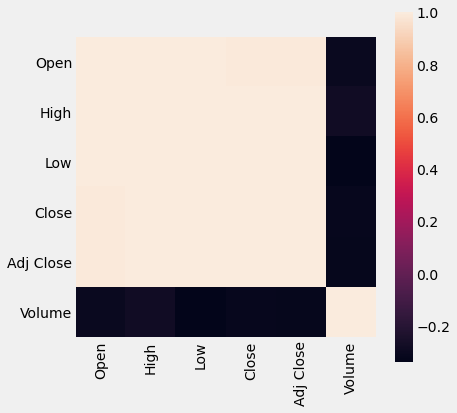

In [5]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),square=True,)
plt.show()

In [6]:
# import plotly.express as px

# fig = px.imshow(data.corr())
# fig.show()

In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
x_data = data[["Open","High","Low"]]
y_data = data["Close"]

X = x_data.to_numpy()
y = y_data.to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

y_predict = dt.predict(X_test)

In [11]:
compare = pd.DataFrame(data={"Orignal Close":y_test,"Predicted Close":y_predict})
compare.head()

,Orignal Close,Predicted Close
0,233.779999,234.809998
1,208.750000,210.080002
2,219.419998,223.720001
3,230.720001,232.330002
4,221.020004,222.860001
